# Algoritmo Perceptron (Fase Treinamento)

In [1]:
import numpy as np

In [2]:
# valores de entrada
X = np.array([
    [-1, 0.1, 0.4, 0.7],
    [-1, 0.3, 0.7, 0.2],
    [-1, 0.6, 0.9, 0.8],
    [-1, 0.5, 0.7, 0.1],
])

d = np.array([1, -1, -1, 1]) # valores de X

w = np.random.rand(1,4) # pesos
#w = np.array([-0.05 ,  0.146, -0.174,  0.011])

n = 0.01 # taxa de aprendizagem

def sinal(x):
    return np.where(x >= 0, 1, -1)

contador_epocas = 0

while contador_epocas <= 500:
    
    erro = False
    
    for i in range(len(X)):
        
        u = np.dot(w, X[i])
        y = sinal(u)
        
        if y != d[i]:
            w = w + n * (d[i] - y) * X[i]
            erro = True
            
    contador_epocas += 1
    
    if not erro:
        break
print(contador_epocas)

128


# Fase de Operação

In [3]:
amostra_x = np.array([-1, 0.5, 0.7, 0.1],)

peso_treinamento = w.copy()

u_operacao = np.dot(peso_treinamento, amostra_x)

y_operacao = sinal(u_operacao)

if y_operacao == -1:
    print("Pertence a classe A")
if y_operacao == 1:
    print("Pertence a classe B")

Pertence a classe B


# Exercícios

1) *Explique como se processa a regra de Hebb no contexto do algortimo de aprenziado do Perceptron*

*R*: Caso a saída produzida pelo Perceptron não coincida com a saída desejada, os pesos sinápticos e o limiar (ou viés) são ajustados proporcionalmente aos valores de entrada, segundo a regra de atualização do Perceptron. Por outro lado, se a saída estiver correta, nenhuma atualização é realizada. Esse processo é repetido iterativamente para todas as amostras do conjunto de treinamento, até que o Perceptron classifique corretamente todas as amostras (caso elas sejam linearmente separáveis).

================================================================================================================================================  

3) *Explique por que o Perceptron somente consegue classificar padrões cuja fronteira de separação entre as classes seja linear*

*R*: Devido a função de ativição, típico caso de discriminador linear, tendo-se assim como ativação a função sinal:  
\begin{cases}
\text{1}, & \text{se } x > 0 \\
\text{zero}, & \text{se } x = 0 \\
\text{-1}, & \text{se } x < 0
\end{cases}

Em termos matemáticos, a saída do <i>Perceptron</i>, tendo a função sinal (acima) como função ativação:
\begin{cases}
1, \quad \text{se } \sum w_i \cdot x_i - \theta \geq 0 \iff w_1 \cdot x_1 + w_2 \cdot x_2 - \theta \geq 0 \\
-1, \quad \text{se } \sum w_i \cdot x_i - \theta < 0 \iff w_1 \cdot x_1 + w_2 \cdot x_2 - \theta < 0
\end{cases}

Sendo as desigualdades acima representadas por uma expressão de primeiro grau (linear), a fronteira de decisão para esta instância (<i>Perceptron</i> de duas entradas) será então uma reta cuja equação é definida por:  
\begin{equation}
w_1 \cdot x_1 + x_2 \cdot w_2 - \theta = 0
\end{equation}

Falei sobre um <i>Perceptron</i> de duas entadas no texto, mas no código utilizamos um <i>Perceptron</i> com 4 entradas, no entando continuou sendo uma forma linear

================================================================================================================================================  

4) *Em termos de implementação computacional descreva a importância de tratarmos o limiar de ativação {$\theta$} como um dos elementos do vetor de pesos {*W*}.*

*R*: A importância está em tratar as o viés e o peso de forma vetorial, como a mesma regra de ajuste é aplicada tanto para o peso como para o limiar, pode-se inserir o valor do limiar dentro do vetor de pesos.  
\begin{equation}
\left\{
\begin{array}{ll}
    w_i^{\text{atual}} = w_i^{\text{anterior}} + \eta \cdot \left( d^{(k)} - y \right) \cdot x_i^{(k)} \quad & (3.5) \\[8pt]
    \theta_i^{\text{atual}} = \theta_i^{\text{anterior}} + \eta \cdot \left( d^{(k)} - y \right) \cdot (-1) \quad & (3.6)
\end{array}
\right.
\end{equation}

Portanto, as expressões (3.5) e (3.6), podem ser representadas por uma única expressão vetorial dada por:  
\begin{equation}
\mathbf{w}^{\text{atual}} = \mathbf{w}^{\text{anterior}} + \eta \cdot \left( d^{(k)} - y \right) \cdot \mathbf{x}^{(k)}
\end{equation}

Onde:  
- $\mathbf{w}$ é o vetor contendo o limiar (viés) e os pesos  
- $\mathbf{x}^{(k)}$ é a k-ésima amostra do treinamento  
- $d^{(k)}$ é o valor desejado para a k-ésima amostra de treinamento  
- $y$ é o valor da saída produzida pelo *Perceptron*  
- $\eta$ é uma constante que define a taxa de aprendizagem da rede  


6) *R*: Não, não é correto afirmar que as redes convergirão com o mesmo número de épocas, pode ser que os inicializadores de pesos sejam diferentes, levando maior tempo ou menos para convergir

9) *R*: Sim, é possível pois os dados estão divididos em 2 classes, e que podem ser separados linearmente.

# 3.6 Projeto Prático

In [4]:
import pandas as pd

In [5]:
dados_treino = pd.read_excel('./Tabela#Seção3.6_RNA.xls')

## Alterando o código Perceptron

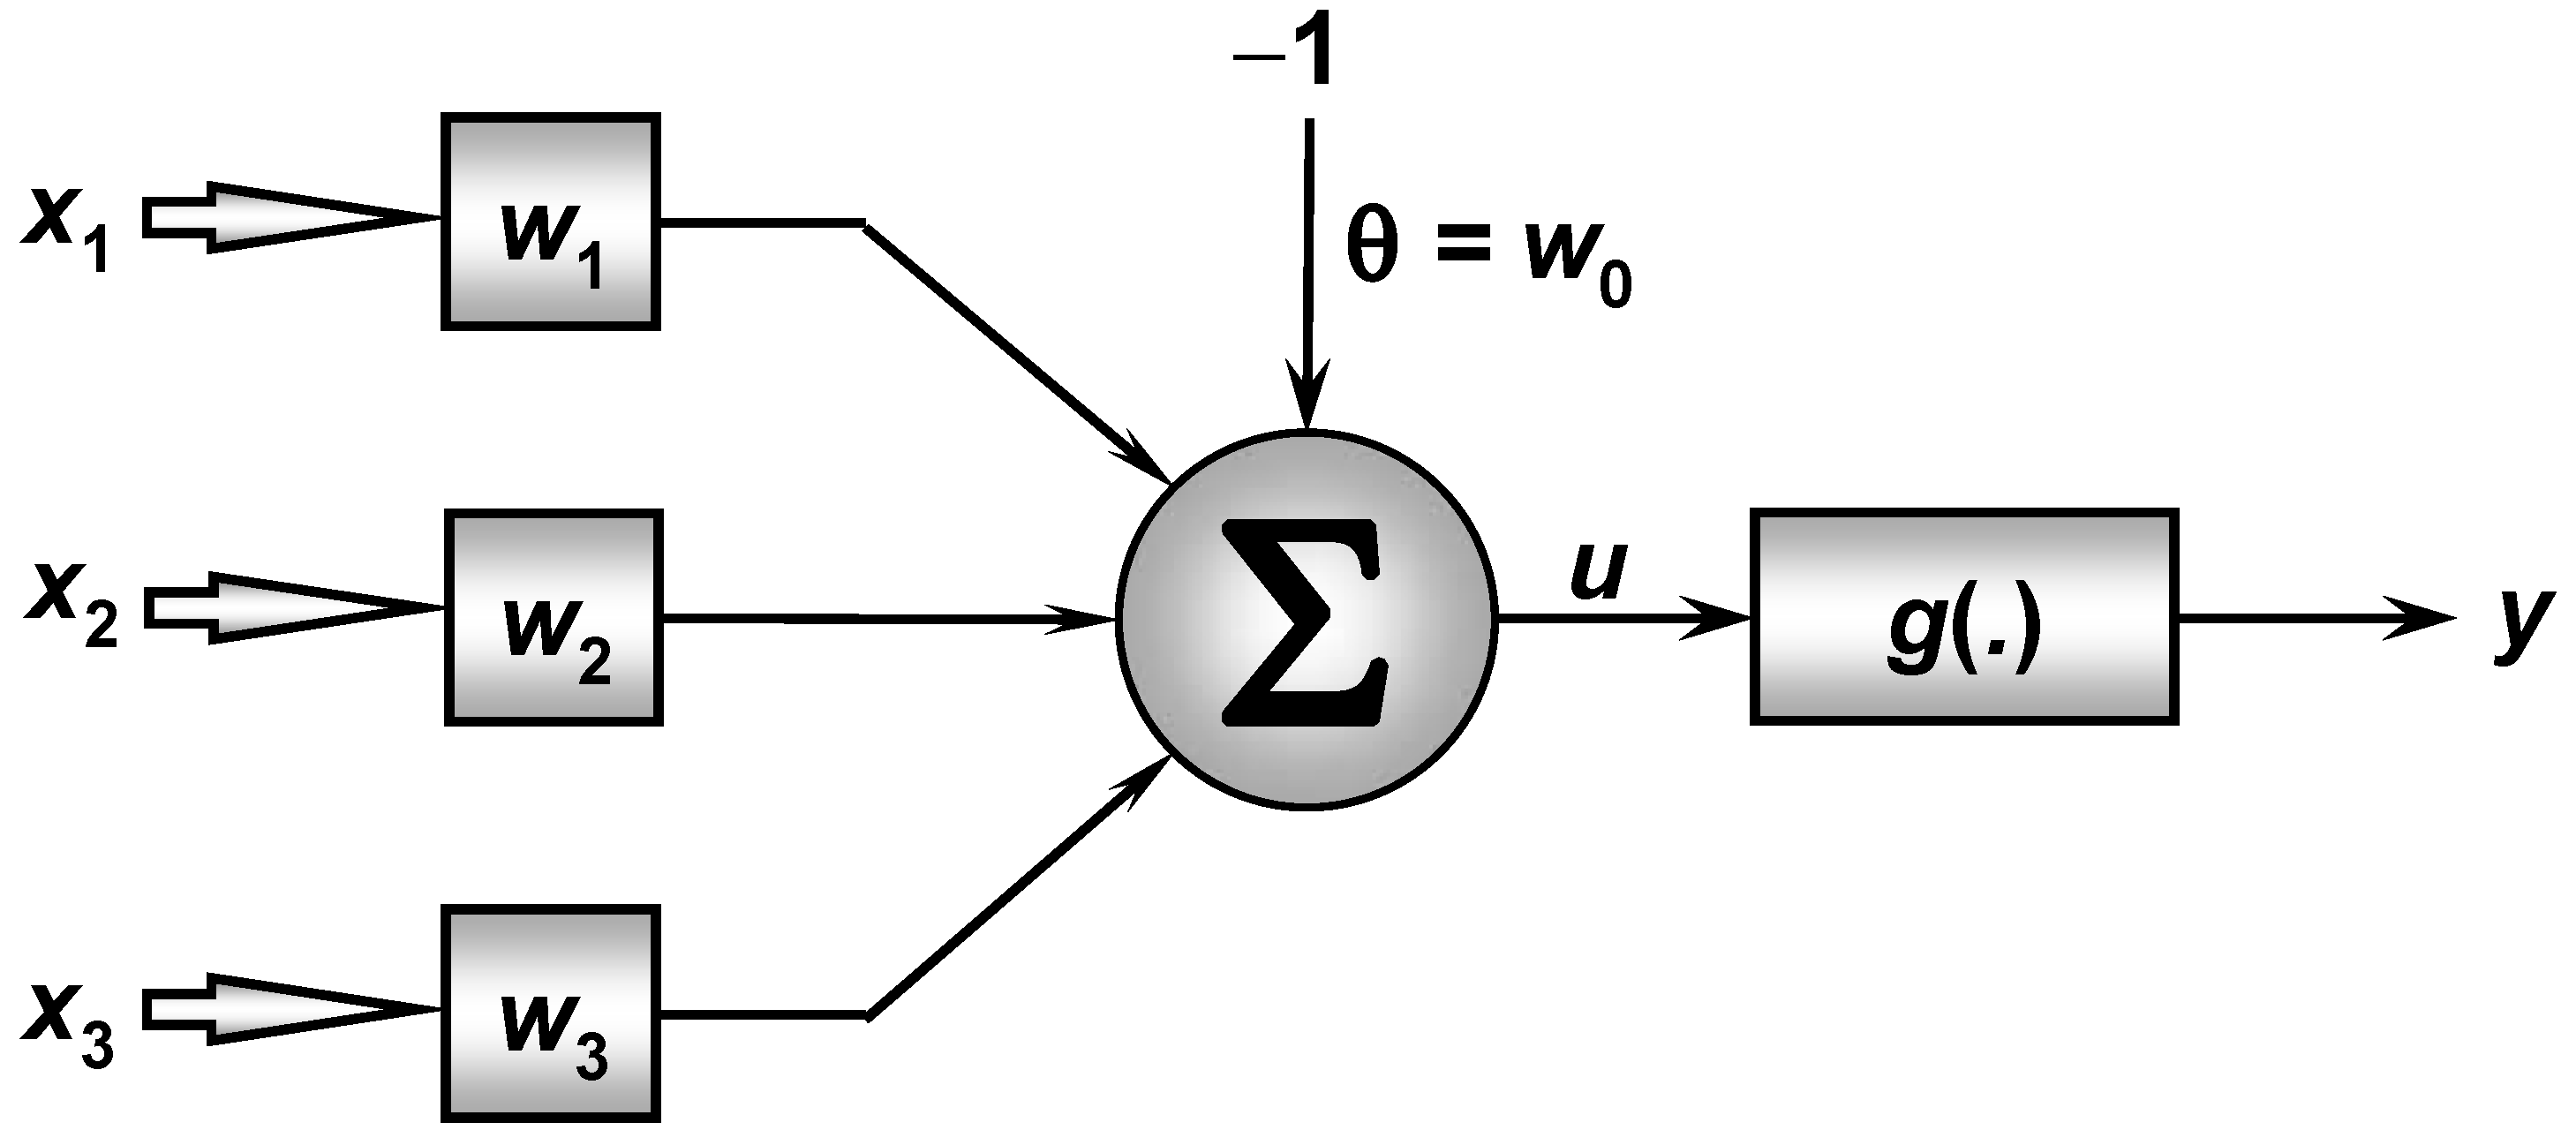

In [6]:
from IPython.display import Image
Image("./Fig#3.8_RNA.png", width=500)

Arquitetura do Perceptron para o projeto prático

In [7]:
def sinal(x):
    return np.where(x >= 0, 1, -1)

In [8]:
def perceptron_train(dados, n, funcao_ativacao, max_epocas=1000):
    X = dados.iloc[:, :-1].values # separando os dados de treino
    d = dados.iloc[:, -1].values # separando o target

    X = np.hstack((-np.ones((X.shape[0], 1)), X)) # adicionando coluna -1 de viés
    
    w_inicial = np.random.rand(X.shape[1], 1)  # pesos aleatórios com viés
    w_final = w_inicial.copy()
    
    epocas_total = 0
    while True:
        erro = False
        for k in range(len(X)):
            u = np.dot(w_final.T, X[k].reshape(-1, 1)) # potencial de ativacao
            y = funcao_ativacao(u) # passando o meu potencial de ativação para minha função ativação

            if y != d[k]:
                w_final = w_final + n * (d[k] - y) * X[k].reshape(-1, 1) # atualizando os pesos e limiar (viés)
                erro = True

        epocas_total += 1
        if not erro or epocas_total >= max_epocas:
            break
            
    return (w_inicial, w_final, epocas_total)

1) Executar 5 treinamentos iniciando os pesos em cada treinamento com valores aleatórios entre 0 e 1
2) Registrar os resultados dos 5 treinamentos
3) Colocar em operação validando com 10 exemplos do livro

In [9]:
import pandas as pd

resultados = []

for i in range(5): # Executando o treinamento 5 vezes (requisito 1)
    peso_inicial, peso_final, epocas = perceptron_train(dados_treino, 0.01, sinal)

    w_inicial = peso_inicial.flatten()
    w_final = peso_final.flatten()
    
    resultado = {
        'Treinamento': i + 1,
        'Epocas': epocas
    }
    
    for j, valor in enumerate(w_inicial, start=1):
        resultado[f'w{j}_inicial'] = valor

    for j, valor in enumerate(w_final, start=1):
        resultado[f'w{j}_final'] = valor

    resultados.append(resultado)

df_resultados = pd.DataFrame(resultados) # Registrando os resultados (requisito 2)

In [10]:
df_resultados

,Treinamento,Epocas,w1_inicial,w2_inicial,w3_inicial,w4_inicial,w1_final,w2_final,w3_final,w4_final
0,1,435,0.684871,0.024513,0.872409,0.273706,-3.115129,1.563365,2.511211,-0.742812
1,2,357,0.475435,0.619261,0.493657,0.841792,-2.904565,1.397483,2.398721,-0.695138
2,3,396,0.538733,0.926713,0.233573,0.246583,-3.061267,1.558067,2.467253,-0.730761
3,4,464,0.977213,0.587513,0.023747,0.647163,-3.162787,1.600781,2.540199,-0.751429
4,5,348,0.381455,0.104282,0.788776,0.223180,-2.918545,1.408858,2.418434,-0.698488


## Testando em operação

In [11]:
# Dados das amostras
amostras = np.array([
    [-0.3665,  0.0620, 5.9891],
    [-0.7842,  1.1267, 5.5912],
    [ 0.3012,  0.5611, 5.8234],
    [ 0.7757,  1.0648, 8.0677],
    [ 0.1570,  0.8028, 6.3040],
    [-0.7014,  1.0316, 3.6005],
    [ 0.3748,  0.1536, 6.1537],
    [-0.6920,  0.9404, 4.4058],
    [-1.3970,  0.7141, 4.9263],
    [-1.8842, -0.2805, 1.2548]
])

resultados_operacao_total = []

for k in range(amostras.shape[0]):
    resultados_operacao = {
        'Amostra': k + 1,
        'x1': amostras[k, 0],
        'x2': amostras[k, 1],
        'x3': amostras[k, 2]
    }
    
    for i in range(5):
        amostra_x = np.hstack((-1, amostras[k]))  # Adiciona o bias (-1)

        peso_treinamento = df_resultados.iloc[i, -4:].values  # Pega os últimos 4 valores da linha i
        u_operacao = np.dot(peso_treinamento, amostra_x)
        y_operacao = sinal(u_operacao)
        
        resultados_operacao[f'y (T{i+1})'] = 'P1' if y_operacao == -1 else 'P2'
    
    resultados_operacao_total.append(resultados_operacao)

df_final = pd.DataFrame(resultados_operacao_total) # armezenando resultados final (requisito 3)

In [12]:
df_final

,Amostra,x1,x2,x3,y (T1),y (T2),y (T3),y (T4),y (T5)
0,1,-0.3665,0.0620,5.9891,P1,P1,P1,P1,P1
1,2,-0.7842,1.1267,5.5912,P2,P2,P2,P2,P2
2,3,0.3012,0.5611,5.8234,P2,P2,P2,P2,P2
3,4,0.7757,1.0648,8.0677,P2,P2,P2,P2,P2
4,5,0.1570,0.8028,6.3040,P2,P2,P2,P2,P2
5,6,-0.7014,1.0316,3.6005,P2,P2,P2,P2,P2
6,7,0.3748,0.1536,6.1537,P1,P1,P1,P1,P1
7,8,-0.6920,0.9404,4.4058,P2,P2,P2,P2,P2
8,9,-1.3970,0.7141,4.9263,P1,P1,P1,P1,P1
9,10,-1.8842,-0.2805,1.2548,P1,P1,P1,P1,P1


4) *R*: O número de épocas varia pois os pesos são diferentes a cada vez que o algoritmo é iniciado

5) *R*: Sim, minhas classes são linearmente separaveis, pois os dados foram devidamente classificados